In [1]:
pip install svgpathtools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.3 MB/s eta 0:00:00


# Exploring 2D signals (IITG logo outline) using Fourier Series

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
from matplotlib.animation import FuncAnimation
from svgpathtools import svg2paths

## Data Preparation (Extracting the coordinates (x, y) of the points along the contours)

In [3]:
from google.colab import files
from svgpathtools import svg2paths

uploaded = files.upload()
svg_file = list(uploaded.keys())[0]

paths, attributes = svg2paths(svg_file)
print("Number of paths:", len(paths))

main_path = max(paths, key=len)

#sample the path at regular intervals.
num_points = 5000
t_points = np.linspace(0, 1, num_points)

z_coords = np.array([main_path.point(t_val) for t_val in t_points])

x = z_coords.real
y = z_coords.imag

# Normalize and center the coordinates
x_min, x_max = np.min(x), np.max(x)
y_min, y_max = np.min(y), np.max(y)

scale = max(x_max - x_min, y_max - y_min)
x_scaled = (x - x_min) / scale
y_scaled = (y - y_min) / scale

z_scaled = x_scaled + 1j * y_scaled

T = 1.0
t = np.linspace(0, T, num_points)

Saving IIT_logo.svg to IIT_logo (1).svg
Number of paths: 63


## Compute Fourier Coefficients

In [4]:

def compute_Fourier_Series(z, t, K):
    """
    Computes the Fourier series coefficients for a complex-valued signal.
    """
    T = t[-1] - t[0]
    c = {}

    for k in range(-K, K + 1):
        integrand = z * np.exp(-1j * 2 * np.pi * k * t / T)
        c[k] = trapezoid(integrand, t) / T

    return c

In [5]:
K_max = 100
c_z = compute_Fourier_Series(z_scaled, t, K_max)

## Reconstruct the shape using a Fourier series with different values of K

In [8]:
pip install pillow

Saving animation to 'fourier_logo_reconstruction.gif'...
Animation saved.


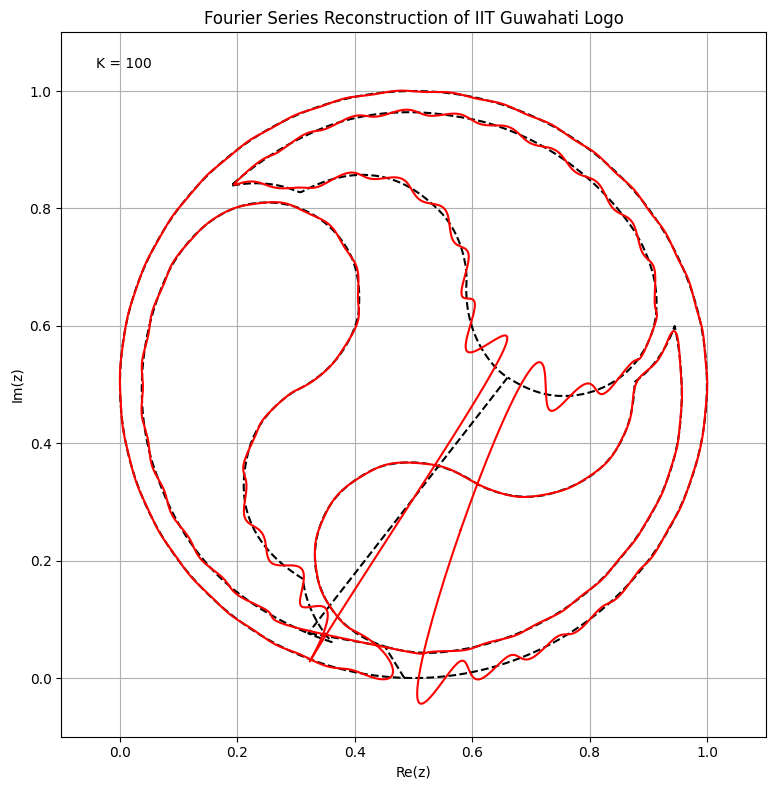

In [11]:
def reconstruct(t, K, c_z, T):
    z_hat = np.zeros_like(t, dtype=np.complex128)
    for k in range(-K, K + 1):
        z_hat += c_z[k] * np.exp(1j * 2 * np.pi * k * t / T)
    return z_hat.real, z_hat.imag

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.set_title('Fourier Series Reconstruction of IIT Guwahati Logo')
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
ax.grid(True)
plt.tight_layout()

# Plot the original shape for reference
ax.plot(x_scaled, y_scaled, 'k--', label='Original Shape')

# Initialize the reconstructed plot
line, = ax.plot([], [], 'r-', label='Reconstruction')
current_K_text = ax.text(0.05, 0.95, '', transform=ax.transAxes, ha='left')

# List of K values to animate through
K_values_to_animate = sorted(list(set([1, 2, 3, 5, 8, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100])))

def update(frame):
    K = K_values_to_animate[frame]
    x_hat, y_hat = reconstruct(t, K, c_z, t[-1])
    line.set_data(x_hat, y_hat)
    current_K_text.set_text(f'K = {K}')

    ax.set_xlim(np.min(x_scaled) - 0.1, np.max(x_scaled) + 0.1)
    ax.set_ylim(np.min(y_scaled) - 0.1, np.max(y_scaled) + 0.1)

    return line, current_K_text

# Create the animation
anim = FuncAnimation(fig, update, frames=len(K_values_to_animate), blit=True)

# Save the animation as a GIF
print("Saving animation to 'fourier_logo_reconstruction.gif'...")
# You may need to install imagemagick or a different writer for this to work.
anim.save('fourier_logo_reconstruction.gif', writer='pillow', fps=2)
print("Animation saved.")


In [12]:
from google.colab import files
files.download("fourier_logo_reconstruction.gif")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Q) Comment on the trade-off between the number of Fourier terms and the reconstruction quality


- As the number of Fourier terms (K) increases, the reconstructed shape more closely approximates the original logo, because higher-frequency components are included in the sum.

- This allows the series to capture the sharp corners, fine curves, and intricate details of the logo.

- The trade-off is that a higher K requires more computational power and storage for the coefficients, as well as more complex summation for reconstruction.

- A higher-fidelity reconstruction comes at the cost of increased computational resources.

### Q) Why does Fourier series allow us to capture even highly irregular shapes?

- This technique is effective because it represents the complex 2D shape as two separate, but related, 1D periodic functions: x(t) and y(t).
- These functions describe the traversal of a point along the shape's boundary over time.
- By applying the Fourier series to the single complex-valued function z(t) = x(t) + iy(t), we can decompose the entire shape into a sum of simple circular motions.
- The Fourier coefficients `c_k` correspond to the amplitude and phase of these constituent circles. The lowest-frequency term, `c_0`, represents the center of the shape.
- Subsequent terms (`c_1`, `c_{-1}`, so on..) are responsible for the overall shape, while the high-frequency terms capture the sharp features.

### Q)  Can you think of real-world applications of this exercise?

- Some Real World Applications of this task could be Computer Vision and Pattern Recognition to recognize, visualize and classify shapes.
- This technique can also be used in Vector Compression as we only need to send fourier coefficients to send the image without having to send the full set of points.